In [35]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/dipalira/Melbourne-Housing-Data-Kaggle/master/Data/Melbourne_housing_FULL.csv')
pd.set_option('display.max_columns', None)

display(df.head(5))

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,68 Studley St,2,h,NaN,SS,Jellis,3/09/2016,2.5,3067.0,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0
1,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
3,Abbotsford,18/659 Victoria St,3,u,NaN,VB,Rounds,4/02/2016,2.5,3067.0,3.0,2.0,1.0,0.0,NaN,NaN,Yarra City Council,-37.8114,145.0116,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [60]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Price              int32
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom2         float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Lattitude        float64
Longtitude       float64
Regionname        object
Propertycount    float64
dtype: object

### Cast price column into integer and remove null values

In [37]:
total_rows, total_columns = df.shape

In [38]:
# Cast price column into integer and remove null values
df = df.dropna(subset=['Price'])
df['Price'] = df['Price'].astype(int)

In [39]:
loss_rows, loss_columns = df.shape

###  Percentage of data loss

In [40]:
percent_lost = ((total_rows - loss_rows) / total_rows) * 100
print('Percentage of loss of data: ', percent_lost)

Percentage of loss of data:  21.83205668875692


### Most common type of property

In [41]:
type_counts = df['Type'].value_counts()
most_common_type = type_counts.idxmax()

print(f"The most common type is: {most_common_type}")

The most common type is: h


<Axes: xlabel='Type'>

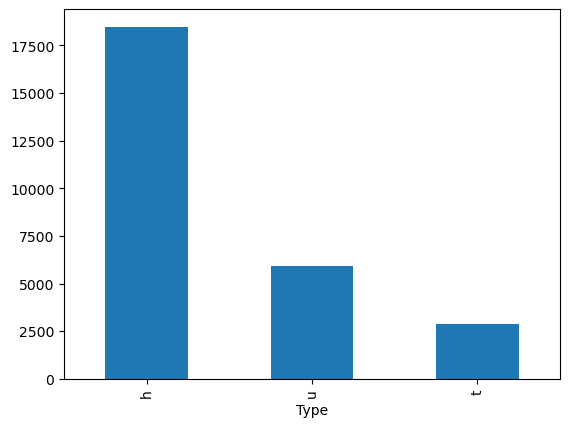

In [42]:
type_counts.plot(kind='bar')

### What percentage of the properties represent

In [43]:
total_properties = sum(type_counts)
percentage_properties = (type_counts / total_properties) * 100

print(f'The property {most_common_type} is {percentage_properties[most_common_type]:.2f}% of the dataset')

The property h is 67.79% of the dataset


<Axes: xlabel='Type'>

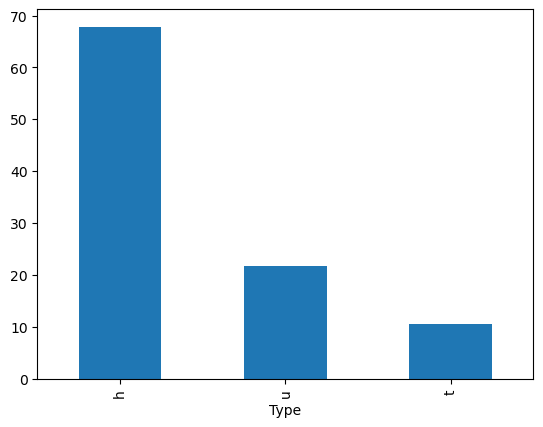

In [44]:
percentage_properties.plot(kind='bar')

### Graph to show the frecuency of each property type in descending order

<Axes: xlabel='Type', ylabel='count'>

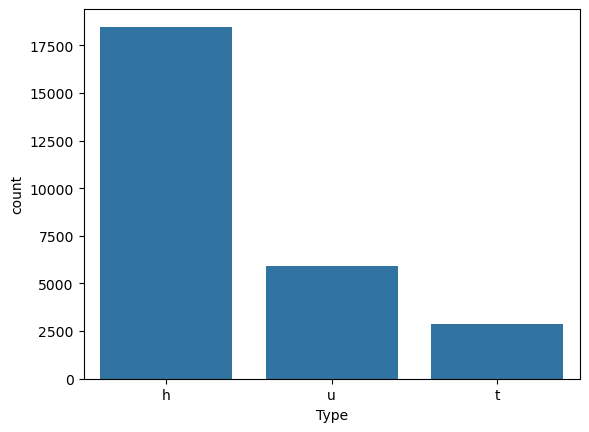

In [45]:
import seaborn as sns

sns.countplot(data=df, x='Type', order=df['Type'].value_counts().index)

### How does the number of rooms impact the median property price?
 Represent in using a bar chart

In [46]:
df.head(3)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


In [47]:
median_price_by_rooms = df.groupby('Rooms')['Price'].median()
median_price_by_rooms

Rooms
1      390000.0
2      678000.0
3      900000.0
4     1205250.0
5     1550000.0
6     1660000.0
7     1350000.0
8     1535883.0
9     1380000.0
10    2115000.0
12    2705000.0
16    5000000.0
Name: Price, dtype: float64

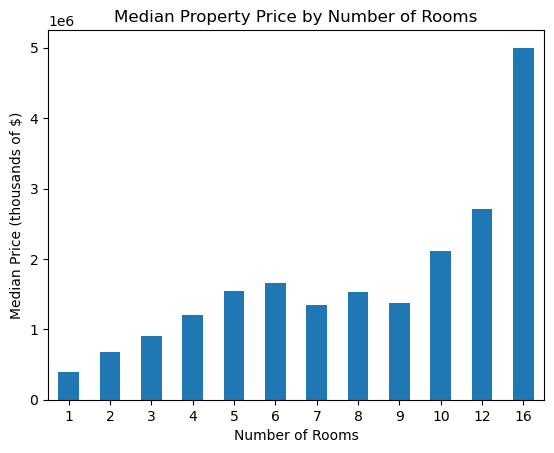

In [48]:
import matplotlib.pyplot as plt

median_price_by_rooms.plot(kind='bar')
plt.title('Median Property Price by Number of Rooms')
plt.xlabel('Number of Rooms')
plt.ylabel('Median Price (thousands of $)')
plt.xticks(rotation=0)
plt.show()

### Spearman correlation coefficient between price and number of rooms

In [49]:
from scipy.stats import spearmanr

spearman_correlation, p_value = spearmanr(df['Rooms'], df['Price'])

print(f'Spearman correlation coefficient: {spearman_correlation:.2f}')
print(f'P-value: {p_value:.2f}')

Spearman correlation coefficient: 0.50
P-value: 0.00


- The p-value 0.00 means that we can reject the null hypothesis that there is no correlation between the two variables. 
- A coefficient of 0.50 means there is a strong correlation between higher property prices and a greater number of rooms

### Is there a relatioship between the distance from the Central Business District (CBD) and the property price?

In [50]:
display(df.head(3))

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,NaN,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.0,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.0,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0


### Cast Distance column into integer and drop null values

In [62]:
df = df.dropna(subset=['Distance'])

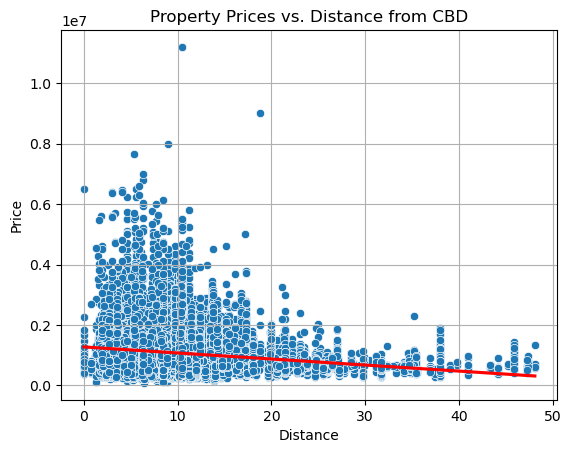

In [65]:
sns.scatterplot(x='Distance', y='Price', data=df)
plt.xlabel('Distance from CBD (km)')
plt.ylabel('Price ($)')
plt.title('Property Prices vs. Distance from CBD')
plt.grid(True)

sns.regplot(x='Distance', y='Price', data=df, scatter=False, color='red')

plt.show()


In [63]:
spearman_correlation, p_value = spearmanr(df['Distance'], df['Price'])

print(f'Spearman correlation coefficient: {spearman_correlation:.2f}')
print(f'P-value: {p_value:.2f}')

Spearman correlation coefficient: -0.19
P-value: 0.00


The value of 0.19 indicates a weak negative correlation between distance from the Central Business District (CBD) and property prices.

### Is there a relationship between the property size an the price?

In [70]:
df['BuildingArea'].isna().sum()

16590

In [71]:
df['Landsize'].isna().sum() 

9264

We decided to fill the null values with the mean to retain as much data as possible while minimizing the impact of missing values. 

In [73]:
df['BuildingArea'] = df['BuildingArea'].fillna(df['BuildingArea'].mean())
df['Landsize'] = df['Landsize'].fillna(df['Landsize'].mean())

In [74]:
from scipy.stats import pearsonr

correlation_building, p_value_building = pearsonr(df['BuildingArea'], df['Price'])
print(f'Building Area - Pearson correlation coefficient: {correlation_building:.2f}')
print(f'P-value: {p_value_building:.4f}')

Building Area - Pearson correlation coefficient: 0.07
P-value: 0.0000


The Pearson correlation coefficient of 0.07 indicates a very weak positive correlation between building area and property price.
The low correlation value suggests that building area may not be a strong predictor of property price.

In [75]:
correlation_land, p_value_land = pearsonr(df['Landsize'], df['Price'])
print(f'Land Size - Pearson correlation coefficient: {correlation_land:.2f}')
print(f'P-value: {p_value_land:.4f}')

Land Size - Pearson correlation coefficient: 0.03
P-value: 0.0000


The Pearson correlation coefficient of 0.03 indicates an extremely weak positive correlation between land size and property price.
The very low correlation value implies that land size is not a strong predictor of property price.

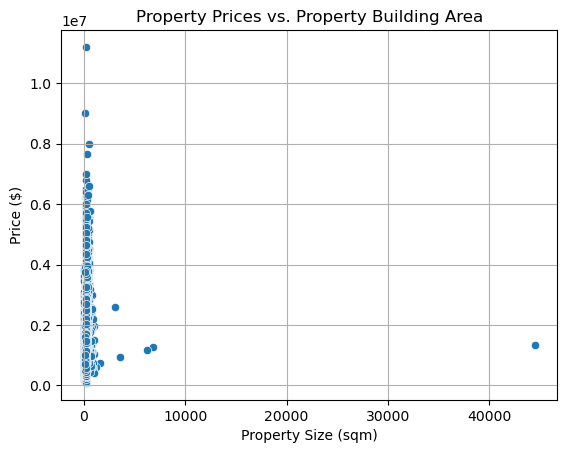

In [76]:
sns.scatterplot(x='BuildingArea', y='Price', data=df) 
plt.xlabel('Property Size (sqm)') 
plt.ylabel('Price ($)')
plt.title('Property Prices vs. Property Building Area')
plt.grid(True)
plt.show()

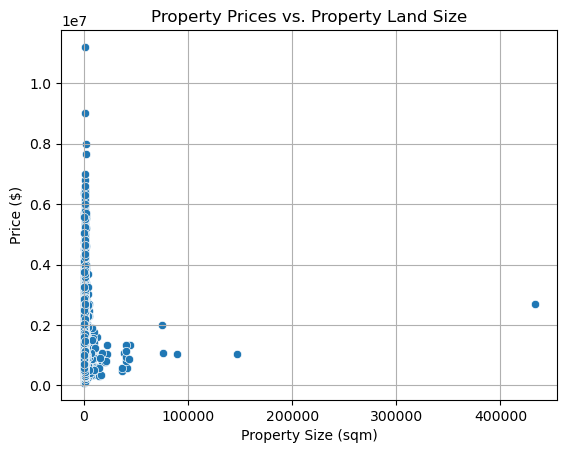

In [77]:
sns.scatterplot(x='Landsize', y='Price', data=df)  # Replace 'Size' with the appropriate column name for property size
plt.xlabel('Property Size (sqm)')  # Adjust the label according to the units used
plt.ylabel('Price ($)')
plt.title('Property Prices vs. Property Land Size')
plt.grid(True)
plt.show()

### Use a quantile based discretization function to categorize the landsize variable and create a bar plot

In [82]:
df['Landsize'].describe()

count     27246.000000
mean        593.488933
std        3052.358263
min           0.000000
25%         351.000000
50%         593.488933
75%         593.488933
max      433014.000000
Name: Landsize, dtype: float64

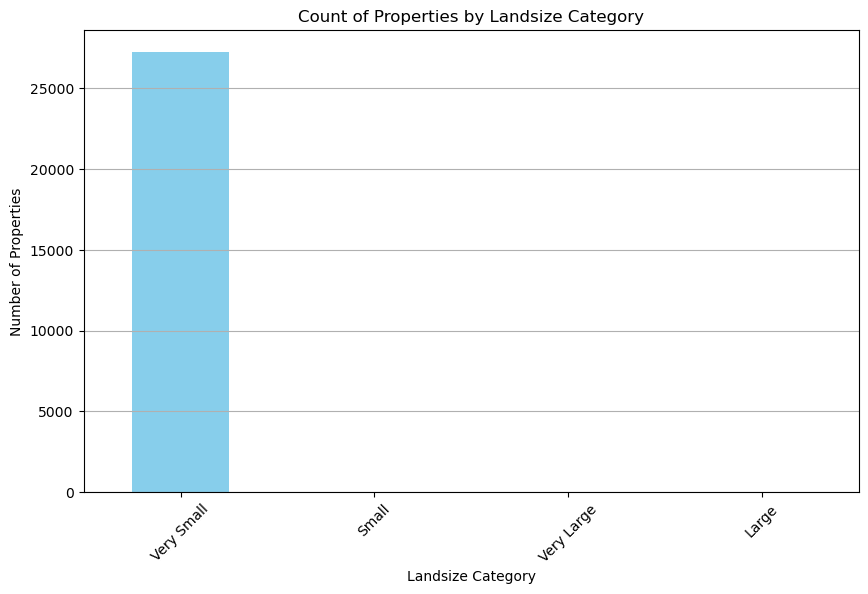

In [87]:
bins = [0, 100000, 200000, 300000, df['Landsize'].max()]     
labels = ['Very Small', 'Small', 'Large', 'Very Large']
df['Landsize_category'] = pd.cut(df['Landsize'], bins=bins, labels=labels, include_lowest=True)
df['Landsize_category'].value_counts()
   
category_counts = df['Landsize_category'].value_counts()


plt.figure(figsize=(10, 6))
category_counts.plot(kind='bar', color='skyblue')
plt.title('Count of Properties by Landsize Category')
plt.xlabel('Landsize Category')
plt.ylabel('Number of Properties')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [103]:
df['Landsize'].drop_duplicates()

1         202.0
2         156.0
4         134.0
5          94.0
6         120.0
          ...  
34186    1366.0
34225    1023.0
34477    2148.0
34517    1098.0
34824    1163.0
Name: Landsize, Length: 1558, dtype: float64

Does the dataset cantain any properties that are priced significantly above or below the average?

In [106]:
df.head(5)

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount,Landsize_category
1,Abbotsford,85 Turner St,2,h,1480000,S,Biggin,3/12/2016,2.5,3067.0,2.0,1.0,1.0,202.0,156.834586,NaN,Yarra City Council,-37.7996,144.9984,Northern Metropolitan,4019.0,Very Small
2,Abbotsford,25 Bloomburg St,2,h,1035000,S,Biggin,4/02/2016,2.5,3067.0,2.0,1.0,0.0,156.0,79.000000,1900.0,Yarra City Council,-37.8079,144.9934,Northern Metropolitan,4019.0,Very Small
4,Abbotsford,5 Charles St,3,h,1465000,SP,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,0.0,134.0,150.000000,1900.0,Yarra City Council,-37.8093,144.9944,Northern Metropolitan,4019.0,Very Small
5,Abbotsford,40 Federation La,3,h,850000,PI,Biggin,4/03/2017,2.5,3067.0,3.0,2.0,1.0,94.0,156.834586,NaN,Yarra City Council,-37.7969,144.9969,Northern Metropolitan,4019.0,Very Small
6,Abbotsford,55a Park St,4,h,1600000,VB,Nelson,4/06/2016,2.5,3067.0,3.0,1.0,2.0,120.0,142.000000,2014.0,Yarra City Council,-37.8072,144.9941,Northern Metropolitan,4019.0,Very Small


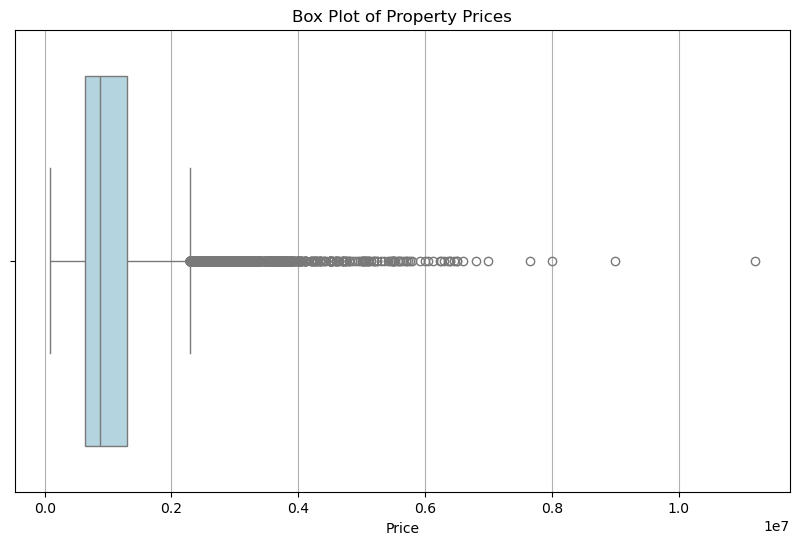

In [107]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=df['Price'], color='lightblue')
plt.title('Box Plot of Property Prices')
plt.xlabel('Price')
plt.grid(axis='x')
plt.show()


### Use Tukey's Method to Detect Outliers

In [108]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)

IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Lower bound for outliers: {lower_bound}")
print(f"Upper bound for outliers: {upper_bound}")

outliers = df[(df['Price'] < lower_bound) | (df['Price'] > upper_bound)]
print(f'Number of outliers detected: {outliers.shape[0]}')

Lower bound for outliers: -355000.0
Upper bound for outliers: 2285000.0
Number of outliers detected: 1278


### Create a New DataFrame Without Outliers

In [109]:

df_no_outliers = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

print(f'Shape of original DataFrame: {df.shape}')
print(f'Shape of DataFrame without outliers: {df_no_outliers.shape}')


Shape of original DataFrame: (27246, 22)
Shape of DataFrame without outliers: (25968, 22)


In [110]:

total_properties = df.shape[0]
outliers_count = outliers.shape[0]


percentage_outliers = (outliers_count / total_properties) * 100
percentage_outliers

4.690596784849152

Skewness: 2.588923986953441
Kurtosis: 13.096886158456796


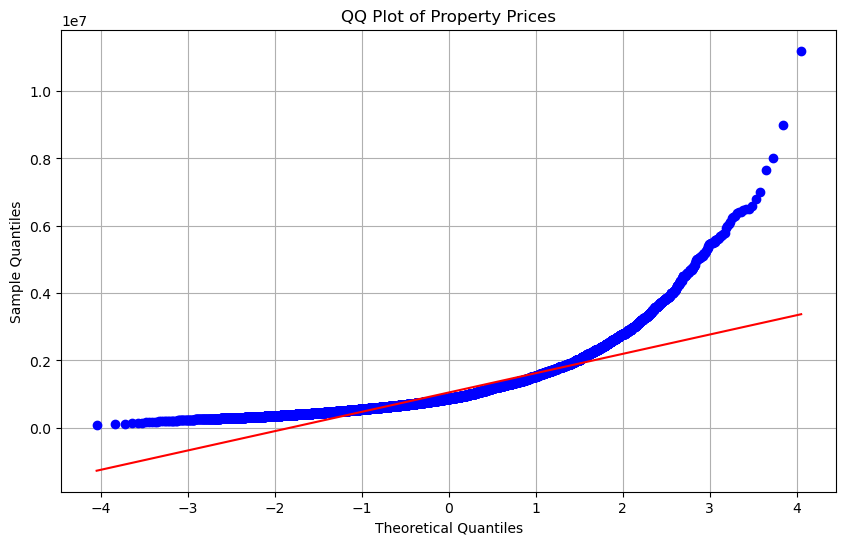

In [113]:
import scipy.stats as stats
skewness = df['Price'].skew()
kurtosis = df['Price'].kurtosis()


print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis}')


plt.figure(figsize=(10, 6))
stats.probplot(df['Price'], dist="norm", plot=plt)
plt.title('QQ Plot of Property Prices')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.grid()
plt.show()

### Outcome of performing a normality test ( Kolmogorov-Smirno)